# Importing data

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import pandas as pd
import seaborn as sns

import h5py

## ESA Climate Change Initiative (CCI) SM v07.1

In [3]:
file = '/scratch/ntavakol/ntavakol/CCI_Final/CCI_Lon_Monthly.nc'
ds_sm = xr.open_dataset(file)
ds_sm

<xarray.Dataset>
Dimensions:    (time: 120, bnds: 2, lon: 1440, lat: 600)
Coordinates:
  * time       (time) datetime64[ns] 2011-01-16 ... 2020-12-16
  * lon        (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat        (lat) float64 89.88 89.62 89.38 89.12 ... -59.38 -59.62 -59.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    sm         (time, lat, lon) float32 ...
Attributes: (12/47)
    CDI:                          Climate Data Interface version 1.9.10 (http...
    Conventions:                  CF-1.9
    source:                       WARP 5.5R1.1/AMI-WS/ERS12 Level 2 Soil Mois...
    institution:                  TU Wien (AUT); VanderSat B.V. (NL)
    title:                        ESA CCI Surface Soil Moisture COMBINED acti...
    contact:                      cci_sm_contact@eodc.eu
    ...                           ...
    geospatial_lon_resolution:    0.25 degree
    spatial_resolution:           25km
    time_coverage_start:          20110101T000000Z
    time_coverage_end:            20110101T235959Z
    frequency:                    mon
    CDO:                          Climate Data Operators version 1.9.10 (http...

## TerraClimate

In [4]:
file = '/scratch/ntavakol/ntavakol/aet/TerraClimate_aet.nc'
ds_aet = xr.open_dataset(file)
ds_aet

<xarray.Dataset>
Dimensions:  (time: 120, lon: 8640, lat: 4320)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
Data variables:
    crs      int16 ...
    aet      (time, lat, lon) float32 ...
Attributes: (12/51)
    CDI:                             Climate Data Interface version 1.9.10 (h...
    Conventions:                     CF-1.6
    source:                          WorldClim v2.0 (2.5m), CRU Ts4.0, JRA-55
    institution:                     University of California Merced
    method:                          These layers from TerraClimate were deri...
    title:                           TerraClimate: monthly climate and climat...
    ...                              ...
    geospatial_vertical_units:       None
    geospatial_vertical_resolution:  0.0
    geospatial_vertical_positive:    Up
    references:                      Abatzoglou, J.T., S.Z. Dobrowski, S.A. P...
    version:                         v1.0
    CDO:                             Climate Data Operators version 1.9.10 (h...

### Annual AET Anomaly

In [5]:
aet_climo_year = ds_aet.groupby('time.year').mean(dim='time')
aet_climo_year

<xarray.Dataset>
Dimensions:  (lon: 8640, lat: 4320, year: 10)
Coordinates:
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * year     (year) int64 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
Data variables:
    crs      (year) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
    aet      (year, lat, lon) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0

In [6]:
aet_anoms_year = ds_aet.groupby('time.year')-aet_climo_year
aet_anoms_year

<xarray.Dataset>
Dimensions:  (time: 120, lon: 8640, lat: 4320)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
    year     (time) int64 2011 2011 2011 2011 2011 ... 2020 2020 2020 2020 2020
Data variables:
    crs      (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    aet      (time, lat, lon) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0

In [17]:
aet_anoms_year1 = aet_anoms_year.mean(dim=['lat','lon'])
aet_anoms_year1

<xarray.Dataset>
Dimensions:  (time: 120)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
    year     (time) int64 2011 2011 2011 2011 2011 ... 2020 2020 2020 2020 2020
Data variables:
    crs      (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    aet      (time) float32 -9.275 -9.507 -6.372 ... -5.159 -8.341 -8.594

## SOI 

In [18]:
file = "/home/ntavakol/Assignment3/SOI.csv"
df = pd.read_csv(file)
df

,YEAR,MONTH,SOI
0,2011,1,1.7
1,2011,2,2.0
2,2011,3,1.8
3,2011,4,1.2
4,2011,5,0.4
...,...,...,...
115,2020,8,1.0
116,2020,9,1.3
117,2020,10,0.8
118,2020,11,1.1


In [19]:
start_date=str(df.YEAR[0])+'-'+str(df.MONTH[0])+'-01'
end_date=str(df.YEAR[119])+'-'+str(df.MONTH[119])+'-01'
print(start_date)
print(end_date)

2011-1-01
2020-12-01


In [20]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=120, freq='MS')

In [21]:
ds_index=xr.DataArray(df['SOI'],
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='SOI')
ds_index

<xarray.Dataset>
Dimensions:  (time: 120)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
Data variables:
    SOI      (time) float64 1.7 2.0 1.8 1.2 0.4 0.6 ... 0.6 1.0 1.3 0.8 1.1 1.4

In [22]:
elnino = ds_index['SOI'].where(ds_index['SOI']<0)
lanina = ds_index['SOI'].where(ds_index['SOI']>0)

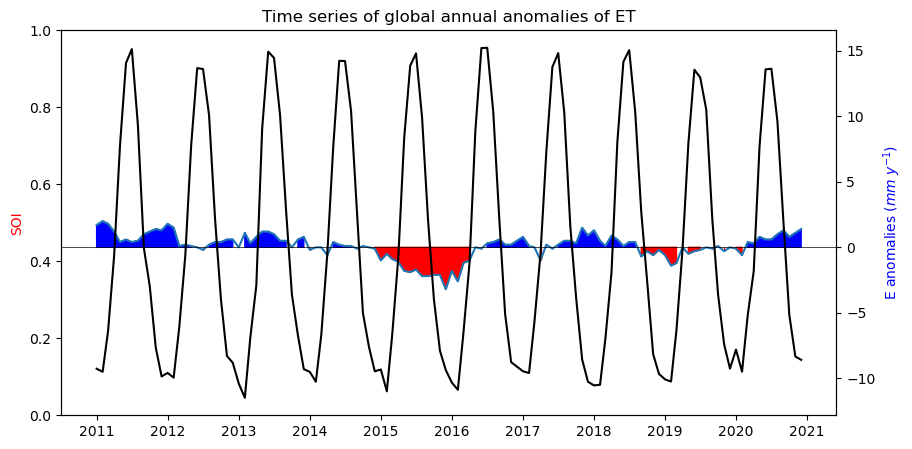

In [55]:
fig, ax = plt.subplots(figsize = (10, 5))
ax2 = ax.twinx()
plt.plot(ds_index['time'],df['SOI'])
plt.fill_between(ds_index['time'].values,elnino,y2=0,color='red')
plt.fill_between(ds_index['time'].values,lanina,y2=0,color='blue')
plt.axhline(0,color='black',linewidth=0.5)
plt.title('Time series of global annual anomalies of ET')
plt.plot(aet_anoms_year1['time'],aet_anoms_year1['aet'],'k')
plt.xlabel("Time (Year)")
ax.set_ylabel('SOI', color = 'r')
ax2.set_ylabel('E anomalies ($mm\;y^{-1}$)', color = 'b')
plt.show()

### Monthly AET Anomaly

In [56]:
aet_climo_month = ds_aet.groupby('time.month').mean(dim='time')
aet_climo_month

<xarray.Dataset>
Dimensions:  (lon: 8640, lat: 4320, month: 12)
Coordinates:
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    crs      (month) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
    aet      (month, lat, lon) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0

In [59]:
aet_anoms_month = ds_aet.groupby('time.month')-aet_climo_month
aet_anoms_month

<xarray.Dataset>
Dimensions:  (time: 120, lon: 8640, lat: 4320)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    crs      (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    aet      (time, lat, lon) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0

In [60]:
aet_anoms_month1 = aet_anoms_month.mean(dim=['lat','lon'])
aet_anoms_month1

<xarray.Dataset>
Dimensions:  (time: 120)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    crs      (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    aet      (time) float32 0.5533 0.9805 0.1415 ... -1.293 -0.5126 0.6649

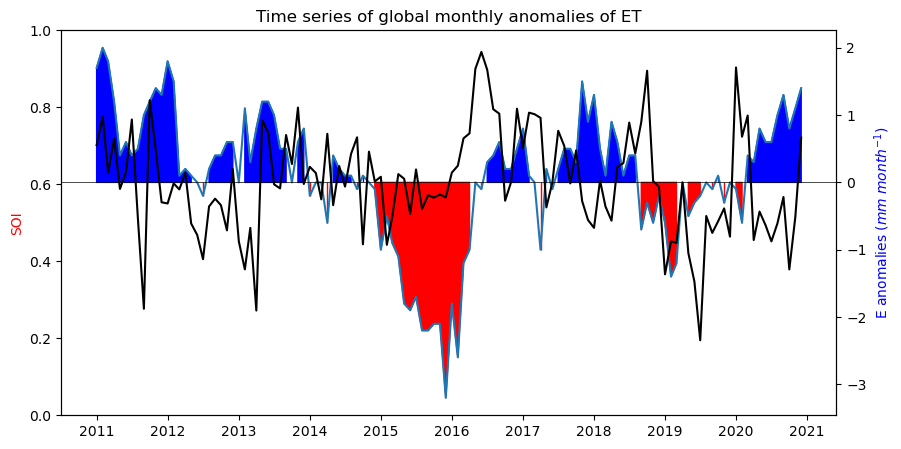

In [64]:
fig, ax = plt.subplots(figsize = (10, 5))
ax2 = ax.twinx()
plt.plot(ds_index['time'],df['SOI'])
plt.fill_between(ds_index['time'].values,elnino,y2=0,color='red')
plt.fill_between(ds_index['time'].values,lanina,y2=0,color='blue')
plt.axhline(0,color='black',linewidth=0.5)
plt.title('Time series of global monthly anomalies of ET')
plt.plot(aet_anoms_month1['time'],aet_anoms_month1['aet'],'k')
plt.xlabel("Time (Year)")
ax.set_ylabel('SOI', color = 'r')
ax2.set_ylabel('E anomalies ($mm\;month^{-1}$)', color = 'b')
plt.show()

## NDVI

In [ ]:
df=np.read_hdf('/scratch/ntavakol/ntavakol/NDVI/MOD13A3.A2018305.h12v08.061.2021351015148.hdf')

In [ ]:
with h5py.File('/scratch/ntavakol/ntavakol/NDVI/MOD13A3.A2018305.h12v08.061.2021351015148.hdf/', 'r') as f1:
    print(list(f1.keys()))  # print list of root level objects
    # following assumes 'x' and 'y' are dataset objects
    ds_x1 = f1['x']  # returns h5py dataset object for 'x'
    ds_y1 = f1['y']  # returns h5py dataset object for 'y'
    arr_x1 = f1['x'][()]  # returns np.array for 'x'
    arr_y1 = f1['y'][()]  # returns np.array for 'y'
    arr_x1 = ds_x1[()]  # uses dataset object to get np.array for 'x'
    arr_y1 = ds_y1[()]  # uses dataset object to get np.array for 'y'
    print (arr_x1.shape)
    print (arr_y1.shape)